# Detect a smile in a image by Convolutional Neural Networks (CNN) 


In this project, I built a simple CNN to detect a *smile* in an image. The data is given in the 'datasets.zip'. If using Colab, you should run the cell below to load the data. If using Jupyter Notebook, you should unzip the file for later use.

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/670_hw8/

/content/drive/My Drive/Colab Notebooks/670_hw8


In [4]:
!pwd

/content/drive/My Drive/Colab Notebooks/670_hw8


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import keras
keras.__version__
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
#pip install tensorflow

In [22]:
# # run this cell if using Colab

!rm -rf datasets.zip
!rm -rf datasets

import io

from google.colab import files as colab_files
uploaded = colab_files.upload()

!unzip datasets.zip


'\n!rm -rf datasets.zip\n!rm -rf datasets\n\nimport io\n\nfrom google.colab import files as colab_files\nuploaded = colab_files.upload()\n\n!unzip datasets.zip\n'

## Part 1 Data generators

First, I need to build data generators to pre-process the data.

I built a *train_generator* and a *validation_generator* that rescale all the images by 1./255. The images were resized with size (32, 32). Set the batch_size to 50 and the class_mode as 'binary'. The *train_generator* took data from the directory 'datasets/train_folder' and the *validation_generator* took data from the directory 'datasets/test_folder'. 


In [ ]:
#pip install keras

In [6]:
import keras
keras.__version__

'2.3.1'

In [8]:
train_dir = 'datasets/train_folder'
validation_dir = 'datasets/test_folder'

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=50,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=50,
        class_mode='binary')


Found 2800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


data batch shape: (50, 32, 32, 3)
labels batch shape: (50,)


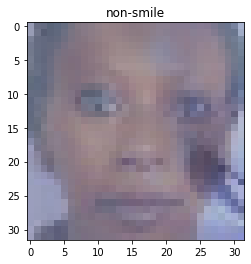

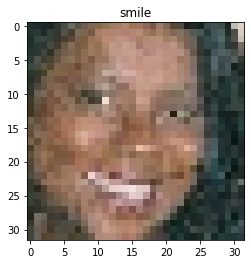

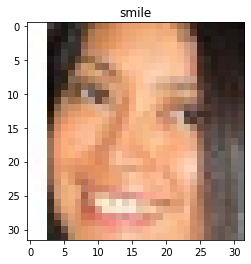

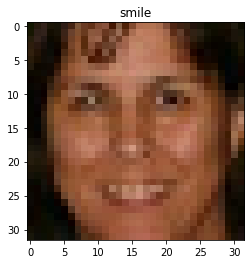

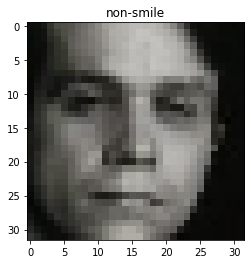

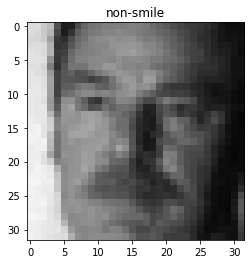

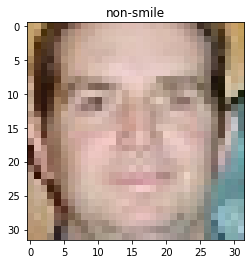

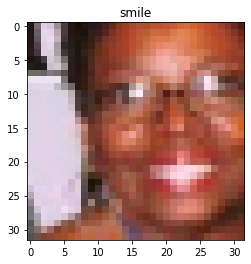

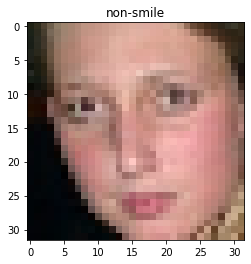

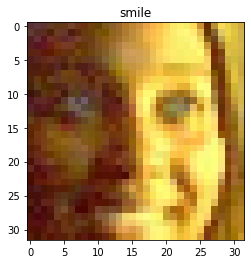

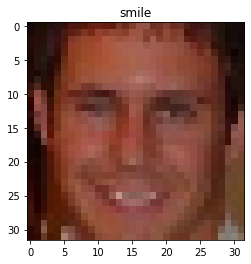

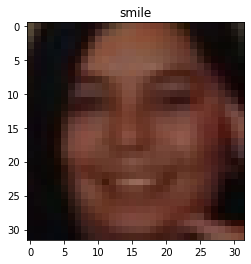

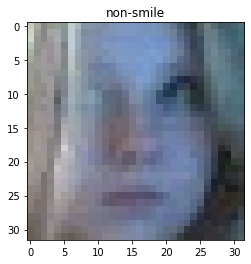

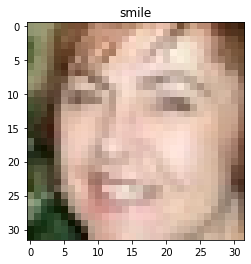

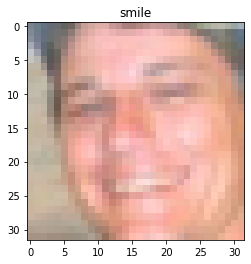

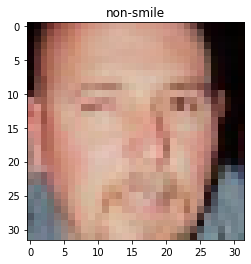

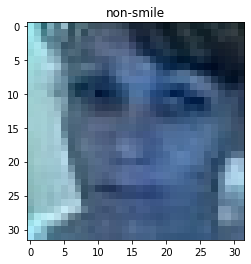

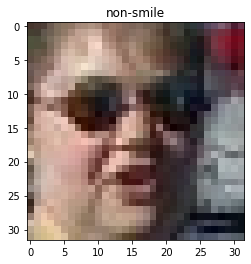

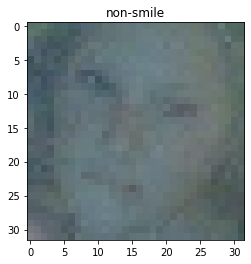

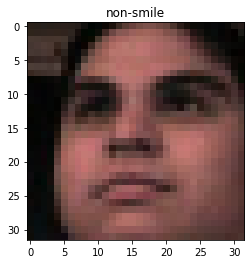

In [ ]:
# # verify whether the data generator looks good 
# # The data is not perfect and there are some non-faces :)
%matplotlib inline
from matplotlib import pyplot as plt
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    for i in range(20):
        plt.figure()
        plt.imshow(data_batch[i])
        if labels_batch[i] == 1:
            plt.title('smile')
        else:
            plt.title('non-smile')
    break

## Part 2 Build the model using Keras - a sequential model.

The first layer is a convolutional layer. Use *Conv2D* with $32$ filters, kernel size $(3,3)$ and *relu* as activation. You also need to specify the input shape since it is the first layer. Here we want input shape to be $(32\times32\times3)$. 

The second layer is the same as the first one, except that I don't need to specify input shape here.

The third layer is *MaxPooling2D* layer with *pool_size* to be $(2,2)$.

The fouth layer is *Dropout* layer with dropout rate 0.25.

Then I used a *Flatten* layer to change the shape of features.

Then a *Dense* layer with output dimension $128$ and *relu* as the activation.

Then a *Dropout* layer with dropout rate 0.5.

Finally a *Dense* layer with output dimension $1$, which are the labels, and *sigmoid* as the activation.

Refer to these: https://keras.io/layers/convolutional/#conv2d, https://keras.io/layers/pooling/#maxpooling2d, https://keras.io/layers/core/#dropout, https://keras.io/layers/core/#flatten, https://keras.io/layers/core/#dense

*model.summary()* can be used to see a summary of the model.

In [10]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

## Part3 Train the model.

First I need to specify the loss function and the optimizer to be used for model training. I used the 'binary_corssentropy' loss and 'RMSprop' optimizer with lr=1e-4. I also specified the metric to be used for evaluation. In this case I used the 'acc' metric.

Then used *model.fit_generator()* to fit the model with steps_per_epoch=100, epochs=100, and validation_steps=50.

In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/100
100/100 [==============================] - 921s 9s/step - loss: 0.6706 - acc: 0.5952 - val_loss: 0.6375 - val_acc: 0.6496
Epoch 2/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6217 - acc: 0.6640 - val_loss: 0.5885 - val_acc: 0.7208
Epoch 3/100
100/100 [==============================] - 8s 83ms/step - loss: 0.5699 - acc: 0.7282 - val_loss: 0.6237 - val_acc: 0.7228
Epoch 4/100
100/100 [==============================] - 8s 84ms/step - loss: 0.5131 - acc: 0.7654 - val_loss: 0.4636 - val_acc: 0.8028
Epoch 5/100
100/100 [==============================] - 8s 81ms/step - loss: 0.4663 - acc: 0.7988 - val_loss: 0.4519 - val_acc: 0.7800
Epoch 6/100
100/100 [==============================] - 9s 89ms/step - loss: 0.4303 - acc: 0.8154 - val_loss: 0.4529 - val_acc: 0.8328
Epoch 7/100
100/100 [==============================] - 8s 85ms/step - loss: 0.4008 - acc: 0.8342 - val_loss: 0.4955 - val_acc: 0.8292
Epoch 8/100
100/100 [==============================] - 8s 84m

## Part4 Inspect the model

Used the history data in model to see the accuracy and loss curves (in a single figure) for both training and validation data. 
Refer to https://keras.io/visualization/#training-history-visualization


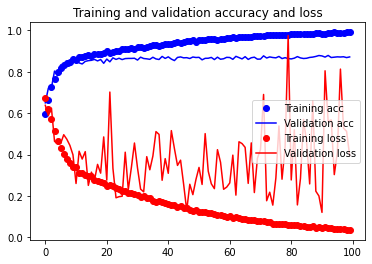

In [14]:
# visualize the accuracy and loss curves for both training and validation data
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()

#plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation accuracy and loss')
plt.legend()

plt.show()

###### The overfitting seems occur when epochs is great than 10.

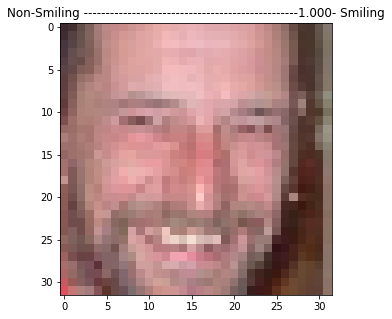

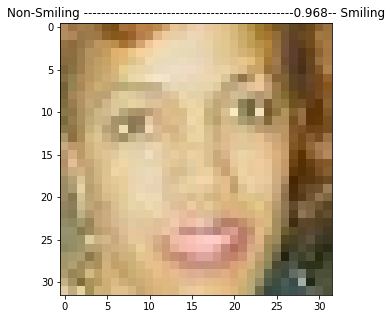

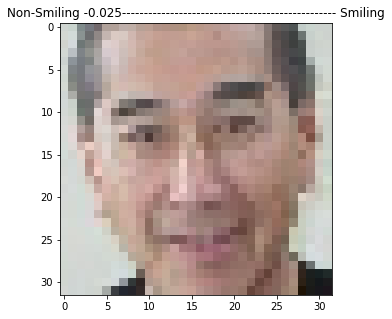

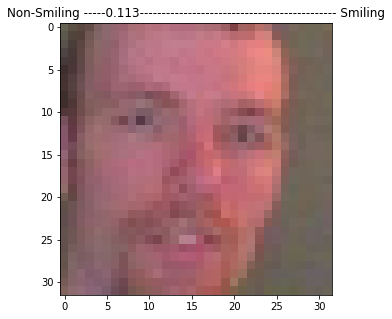

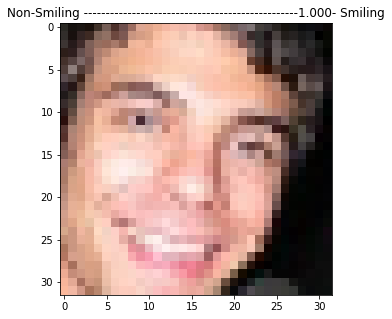

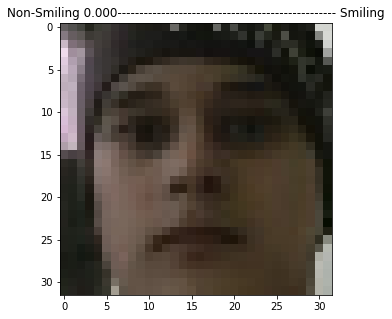

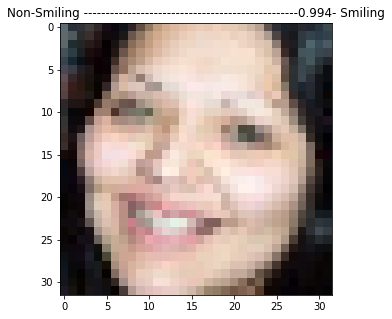

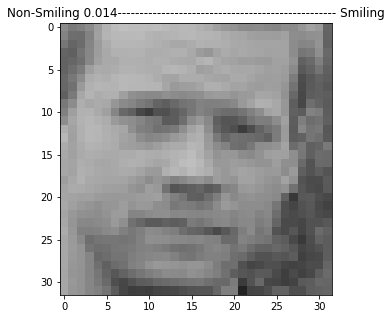

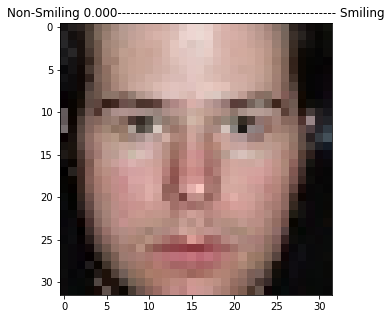

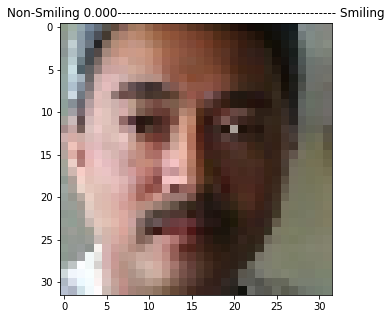

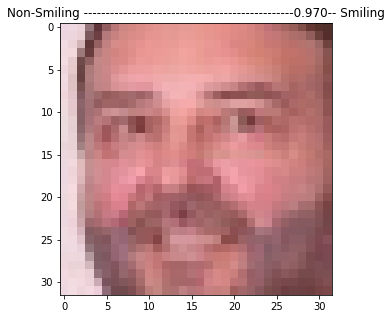

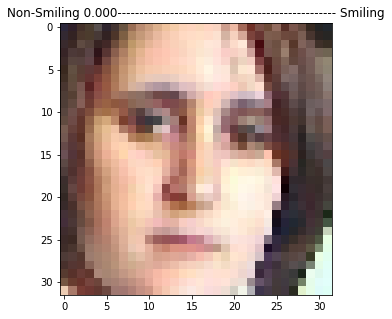

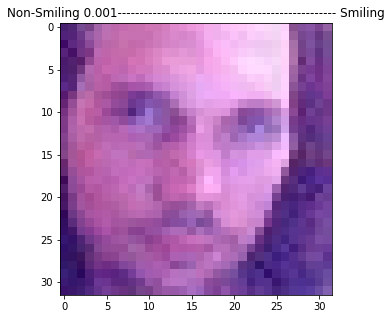

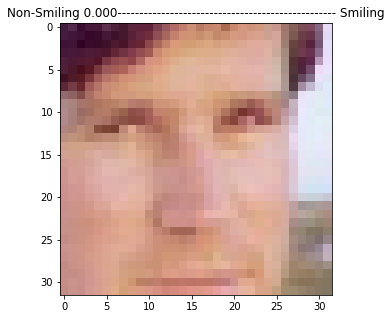

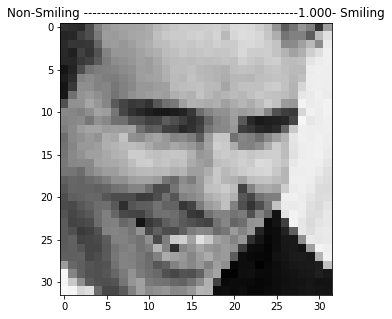

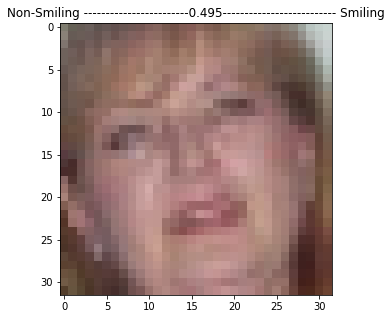

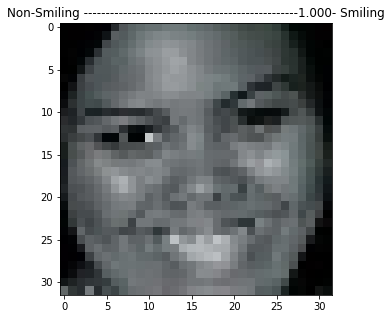

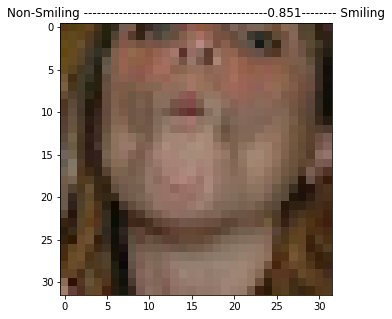

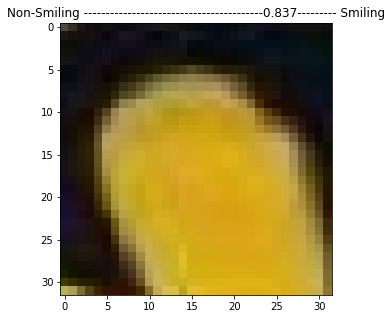

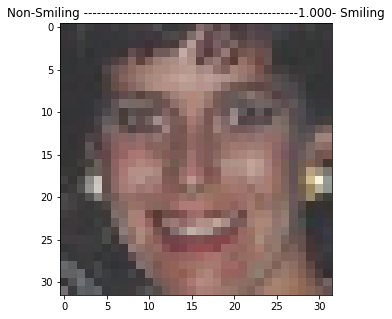

In [15]:
# # # check the label for each image
import numpy as np
def print_indicator(data, model, class_names, bar_width=50):
    plt.figure(figsize=(5,5))
    plt.imshow(data)
    probabilities = model.predict(np.array([data]))[0]
    left_count = int(probabilities[0] * bar_width)
    right_count = bar_width - left_count
    left_side = '-' * left_count
    right_side = '-' * right_count
    plt.title(class_names[0] + ' ' + left_side + '%.3f' % probabilities[0] + right_side + ' ' + class_names[1])

from matplotlib import pyplot as plt

for data_batch, labels_batch in validation_generator:
    for i in range(20):
        img = data_batch[i] 
        print_indicator(img, model, ['Non-Smiling', 'Smiling'])
    break

### Part 4 Try 'tanh' activation function and repeat the training
Changed all the 'relu' activations to 'tanh' of your previous model and repeat the training. 

In [16]:

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model1.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.25))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='tanh'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation='sigmoid'))


In [17]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [18]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6723 - acc: 0.6100 - val_loss: 0.6819 - val_acc: 0.6660
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 0.5306 - acc: 0.7534 - val_loss: 0.4489 - val_acc: 0.7936
Epoch 3/100
100/100 [==============================] - 9s 85ms/step - loss: 0.4434 - acc: 0.8070 - val_loss: 0.4712 - val_acc: 0.8112
Epoch 4/100
100/100 [==============================] - 8s 84ms/step - loss: 0.3917 - acc: 0.8334 - val_loss: 0.3853 - val_acc: 0.8196
Epoch 5/100
100/100 [==============================] - 8s 81ms/step - loss: 0.3605 - acc: 0.8506 - val_loss: 0.2987 - val_acc: 0.8492
Epoch 6/100
100/100 [==============================] - 9s 87ms/step - loss: 0.3410 - acc: 0.8564 - val_loss: 0.3982 - val_acc: 0.8380
Epoch 7/100
100/100 [==============================] - 8s 82ms/step - loss: 0.3246 - acc: 0.8686 - val_loss: 0.3540 - val_acc: 0.8396
Epoch 8/100
100/100 [==============================] - 8s 83ms

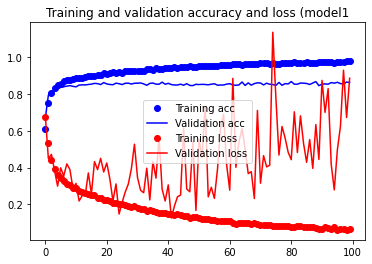

In [20]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(len(acc1))

plt.plot(epochs1, acc1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc1, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()

#plt.figure()

plt.plot(epochs1, loss1, 'ro', label='Training loss')
plt.plot(epochs1, val_loss1, 'r', label='Validation loss')
plt.title('Training and validation accuracy and loss (model1')
plt.legend()

plt.show()

###### The overfitting seems occur when epochs is greater than 8.

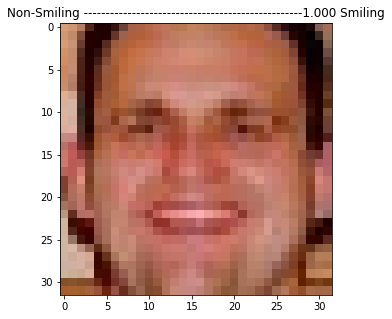

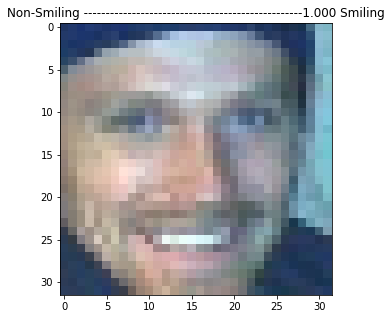

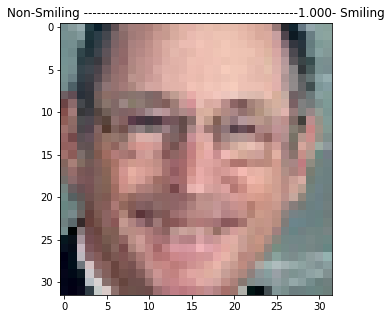

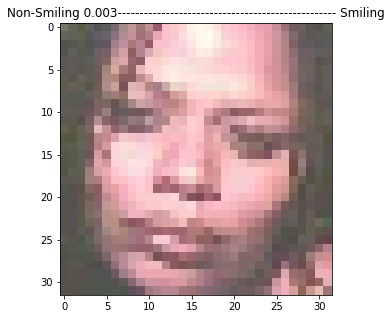

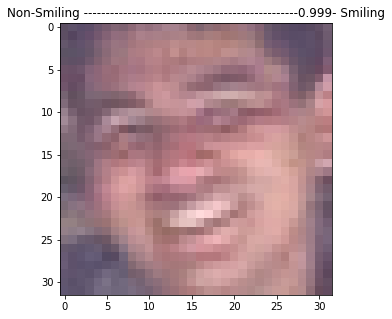

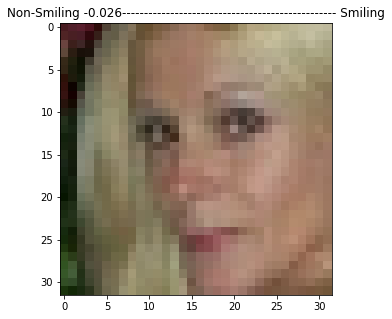

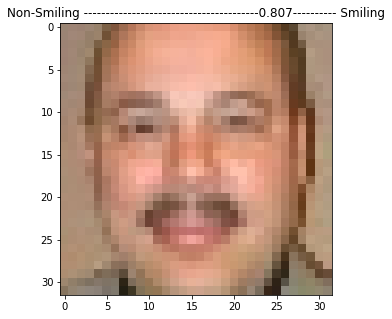

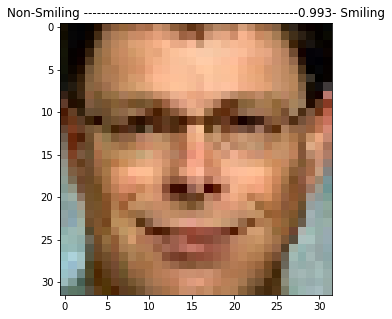

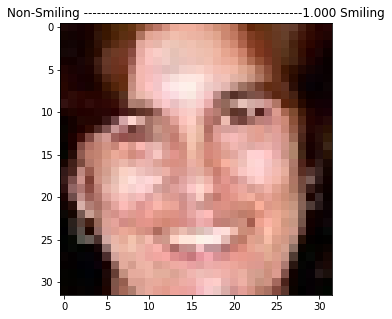

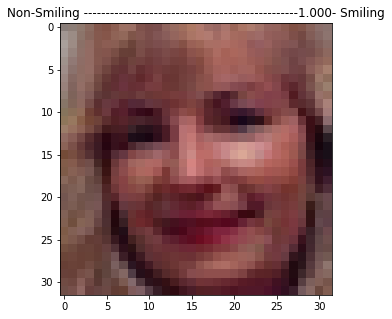

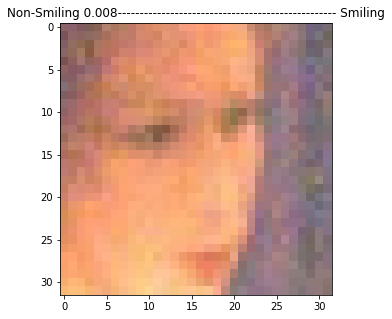

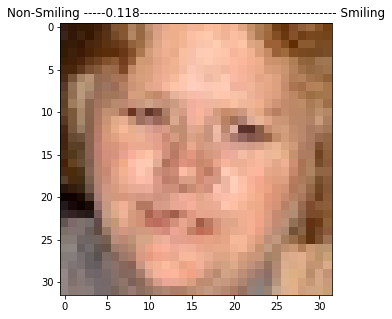

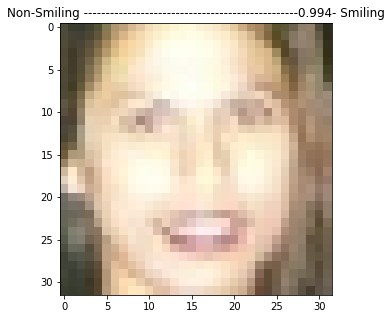

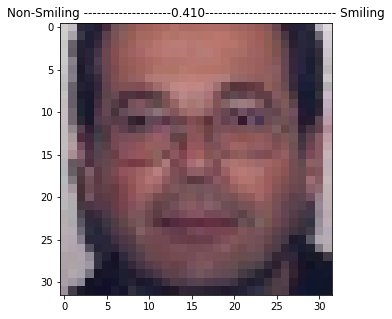

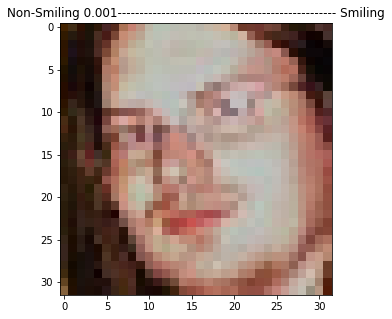

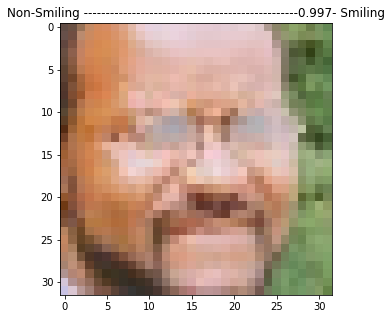

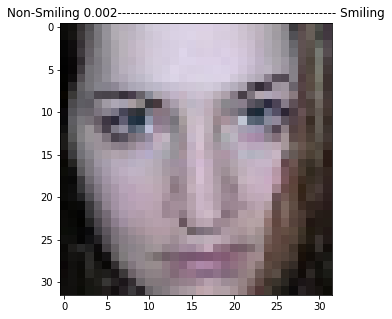

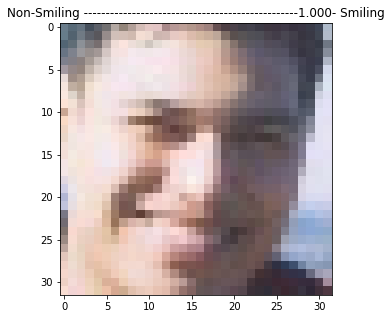

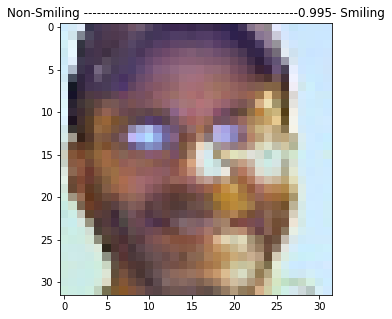

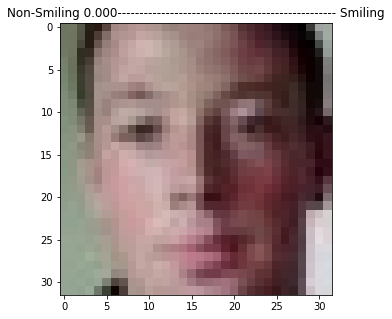

In [21]:
for data_batch, labels_batch in validation_generator:
    for i in range(20):
        img = data_batch[i] 
        print_indicator(img, model1, ['Non-Smiling', 'Smiling'])
    break